<a href="https://colab.research.google.com/github/vishal786-commits/machine-learning-journey/blob/main/classical-ml/logistic-regression-multiclassification-from-scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Authored by** [Vishal Gopalkrishna](https://github.com/vishal786-commits) 🚀 follow for more ❤️

# **Logistic Regression for Multi-Class Classification (From Scratch)**

# **Goal**

The goal of this experiment is to understand how logistic regression can be extended from the basic binary case (two classes) to multi-class classification with three or more classes.

# **Concept**

In the binary case, logistic regression directly predicts the probability of a data point belonging to one of two classes.

 However, when dealing with multiple classes, we use the One-vs-Rest (OvR) approach, where we train a separate binary classifier for each class.

 Each classifier predicts the probability that a given data point belongs to its specific class versus all other classes. After computing the probabilities from all classifiers, we compare them and assign the data point to the class with the highest predicted probability.

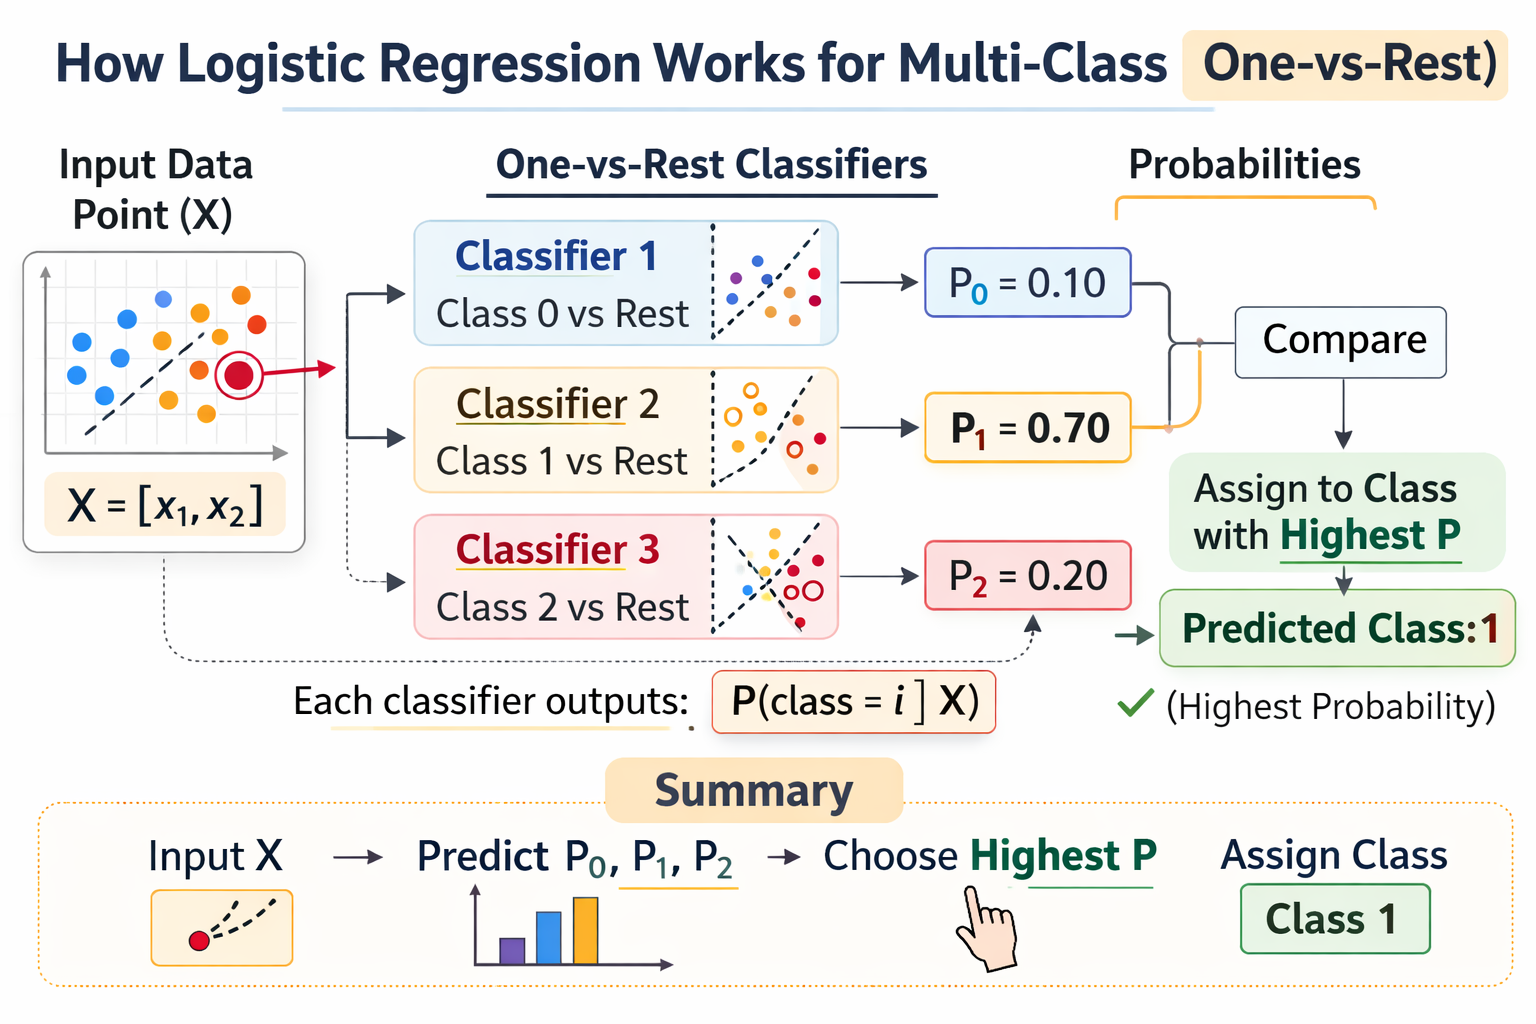

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# Synthetic dataset generation for 3-class classification
from sklearn.datasets import make_classification

# Configuration
N_SAMPLES = 500
N_FEATURES = 2
N_CLASSES = 3
RANDOM_STATE = 17

# Generate dataset
X, y = make_classification(
    n_samples=N_SAMPLES,
    n_features=N_FEATURES,
    n_informative=N_FEATURES,   # all features informative
    n_redundant=0,
    n_classes=N_CLASSES,
    n_clusters_per_class=1,
    random_state=RANDOM_STATE
)

# Reshape target to column vector (useful for manual implementations)
y = y.reshape(-1, 1)

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (500, 2)
Target vector shape: (500, 1)


We create a synthetic dataset using make_classification.

We make 500 data points with 2 features and divide them into 3 different classes. We make sure both features actually help in deciding the class (n_informative=2) and that there are no useless extra features (n_redundant=0).

Each class forms one clear group of points (n_clusters_per_class=1), and we fix random_state so we get the exact same data every time we run this code.

The function gives us X, which is a table of 500 rows and 2 columns (our input data), and y, which is a list of labels (0, 1, or 2). Finally, we reshape y into a column so it’s easier to use later when we build our model.

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
df["Target"] = y

# View first 10 rows
df.head(10)

,Feature_1,Feature_2,Target
0,-1.075652,0.934036,2
1,0.487141,-0.060942,1
2,-0.732065,-0.817466,2
3,-1.051009,1.006016,2
4,1.780812,-1.903151,1
5,-1.119519,2.041661,2
6,-0.968233,0.616266,2
7,-0.931892,1.046086,2
8,0.950301,-1.495538,1
9,0.259604,0.275380,1


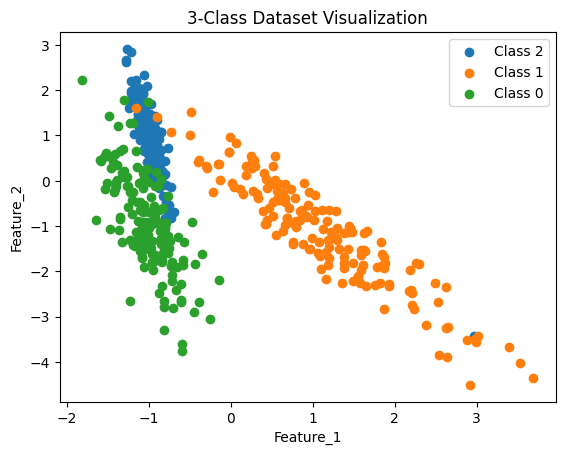

In [ ]:
# Scatter plot with different colors per class
plt.figure()

for label in df["Target"].unique():
    subset = df[df["Target"] == label]
    plt.scatter(subset["Feature_1"], subset["Feature_2"], label=f"Class {label}")

plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title("3-Class Dataset Visualization")
plt.legend()
plt.show()

We can clearly see the clusters here.

In [ ]:
from sklearn.model_selection import train_test_split

# Configuration
TEST_SIZE = 0.20
VAL_SIZE = 0.25   # 25% of remaining 80% → 20% overall
RANDOM_STATE = 17

# First split: Train+Validation and Test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

# Second split: Train and Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=VAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=y_train_val
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (300, 2)
Validation shape: (100, 2)
Test shape: (100, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Configuration
MODEL_TYPE = "ovr"          # One-vs-Rest strategy
MAX_ITER = 1000
RANDOM_STATE = 42

# Initialize model
model = LogisticRegression(
    multi_class=MODEL_TYPE,
    solver="lbfgs",
    max_iter=MAX_ITER,
    random_state=RANDOM_STATE
)

# Fit model
model.fit(X_train, y_train.ravel())

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

Here, we first import LogisticRegression and define some configuration values so our model setup is explicit and reproducible.

We create the model using the **One-vs-Rest **(multi_class="ovr") strategy, which trains one binary classifier per class (for 3 classes, it builds **3 models**).

We specify the *lbfgs* solver to optimize the loss function efficiently.

*[lbfgs* (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) is an efficient optimization algorithm that finds the minimum of a loss function by approximating second-order (curvature) information without storing the full Hessian matrix.]*

Finally, we call model.fit(X_train, y_train.ravel()) to train the model on our training data, where ravel() converts the labels from a column shape (n,1) to a flat (n,) array, since scikit-learn expects a 1D target vector.

In [ ]:
# Evaluate model performance
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.9133333333333333
Validation Accuracy :0.9
Test Accuracy:0.98


In [ ]:

n_labels = len(np.unique(y_train))

for i in range(n_labels):
    sub_model = LogisticRegression(penalty=model.penalty, C=model.C)
    sub_model.coef_ = model.coef_[i].reshape(1, -1)
    sub_model.intercept_ = model.intercept_[i].reshape(-1, 1)
    sub_model.classes_ = np.array([0, 1])

    y_train_ovr = np.where(y_train == i, 1, 0)
    score = sub_model.score(X_train, y_train_ovr)

    print(f"OVR for label={i}, score={score:.4f}")

OVR for label=0, score=0.9533
OVR for label=1, score=0.9733
OVR for label=2, score=0.8800


This code manually inspects how the One-vs-Rest (OvR) logistic regression model works internally by evaluating each binary classifier separately.

First, we count how many unique classes exist in y_train. Then, for each class, we create a temporary binary logistic regression model and manually assign it the learned weights (coef_) and bias (intercept_) corresponding to that specific class from the already trained OvR model.

We set classes_ to [0, 1] because each sub-model is treated as a binary classifier (current class vs all others).

Next, we convert the original multi-class labels into a binary format where the current class is labeled 1 and all other classes are labeled 0.

Finally, we compute and print the accuracy of this individual binary classifier on the training data. In simple terms, we are breaking the multi-class model into its individual “class vs rest” pieces and checking how well each one performs on its own.

/tmp/ipython-input-3403497134.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


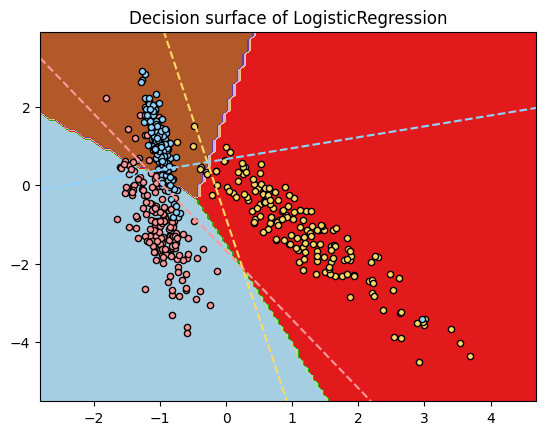

In [ ]:
# We now plot the logistic regression decision regions, overlays the training data points,
# and draws the three One-vs-Rest linear decision boundaries (hyperplanes) that separate each class from the others.
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = [
    "#FF9999",  # pastel red
    "#FFD966",  # soft gold
    "#8FD3FF"   # pastel blue
]
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap="Pastel1", edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

The background colors show which class the model predicts at each location in the feature space, while the dashed lines represent the individual OvR classifiers’ linear boundaries dividing one class from the rest.